In [1]:
import sys
import numpy as np

In [2]:
from numpy import linalg

## Norm

In [3]:
# define an array 
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [4]:
B = A.reshape(3,3)
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [5]:
# euclidean (L2) norm - default
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [6]:
# the Frobenius norm is the L2 norm for a matrix
print(np.linalg.norm(B, 'fro'))

8.306623862918075


In [7]:
# the max norm (P = infinity)
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B, np.inf)) # sum of the most highest values (row wise)

5.0
12.0


In [8]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [9]:
# the magnitude of a unit vector is equal to 1
np.linalg.norm(A_unit)

1.0

## Eigendecomposition

In [10]:
# find the eigenvalues and eigenvectors for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print('eigenvalues: ',eigenvalues)
print('eigenvectors: \n',eigenvectors) # 3 eigenvectors, each column is an eigenvector

eigenvalues:  [1. 2. 3.]
eigenvectors: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
# the eigenvalue w[i] corresponds to the eigenvector v[:,i]
print('Eigenvalues: {}'.format(eigenvalues[1]))
print('Eigenvectors: {}'.format(eigenvectors[:,1]))

Eigenvalues: 2.0
Eigenvectors: [0. 1. 0.]


In [13]:
# check if eigendecomposition is correct
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print(output)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

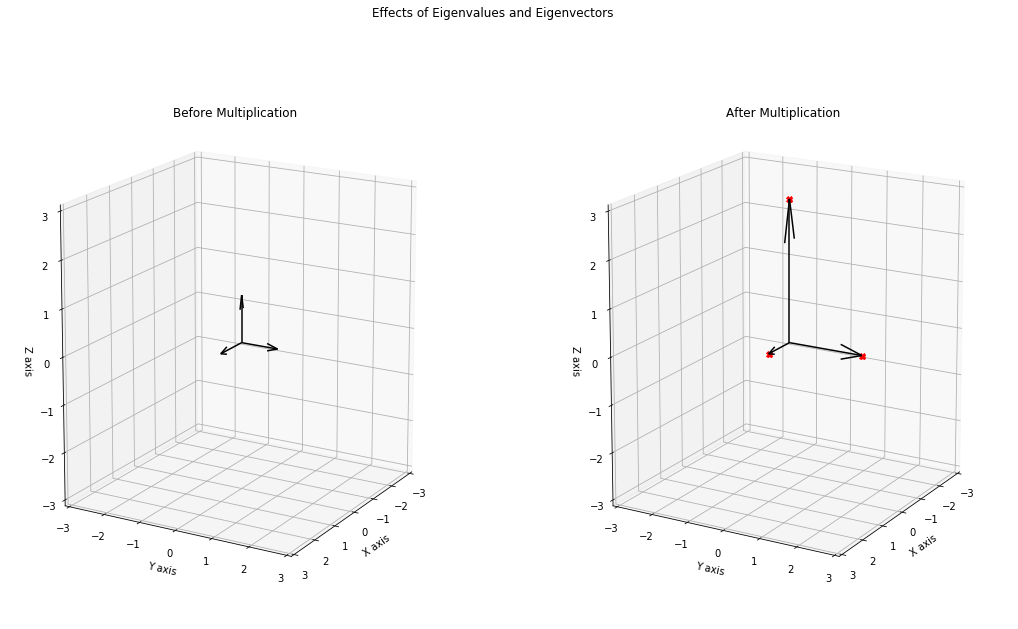

In [15]:
# plot the eigenvectors 
origin = [0,0,0]


fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues and Eigenvectors')
ax1 = fig.add_subplot(121, projection='3d')

ax1.quiver(origin, origin, origin, eigenvectors[0,:], eigenvectors[1,:], eigenvectors[2,:], color='k')
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15,30)
ax1.set_title('Before Multiplication');

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = fig.add_subplot(122, projection='3d')

ax2.quiver(origin, origin, origin, new_eig[0,:], new_eig[1,:], new_eig[2,:], color='k')

# add the eigenvalues to the plot
ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]), (eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15,30)
ax2.set_title('After Multiplication');